<hr>
<h1 style="text-align: center">An ensemble technique to predict Parkinson’s disease using machine
learning algorithms<h1>

<header style="text-align: left; font-size:20px; ">
    <span id='author'>
    El Maftouhi Imad <br>
    Zitan Houssam <br>
    Amgrout Zakaria
    </span> <br>
<span id='filiere'>Master IASDS1 2024/2025</span><br>
<span id='module'>Module “Apprentissage automatique” MST IASD/S1 2024-2025 (M. AIT KBIR)</span><br>
<span id='filiere'>Departement Genie informatique</span><br>
<span id="date" style='text-align:left; '>December, 2024 the 1st</span><br>

<header>

<hr/>

## ABSTRACT
La maladie de Parkinson (MP) est une affection neurodégénérative progressive qui provoque des symptômes moteurs et non moteurs.
Ses symptômes se développent lentement, ce qui rend difficile une identification précoce. L'apprentissage automatique a un potentiel important pour prédire la maladie de Parkinson à partir des caractéristiques cachées dans les données vocales.


prédire la maladie de Parkinson à partir de caractéristiques cachées dans les données vocales. Ce travail a pour but d'identifier les caractéristiques
caractéristiques les plus pertinentes à partir d'un ensemble de données à haute dimension, ce qui permet de classer avec précision la maladie de Parkinson avec un temps de calcul réduit. Un ensemble de données individuels comportant diverses caractéristiques médicales basées sur la voix ont été analysés dans ce travail. Une technique d'algorithme de sélection de caractéristiques d'ensemble (EFSA) basée sur des algorithmes de filtrage, d'enveloppement et d'intégration qui sélectionnent les caractéristiques les plus pertinentes pour la classification de la maladie de Parkinson. Ces techniques peuvent réduire le temps de formation pour améliorer la précision du modèle et minimiser l'ajustement excessif.

In [1]:
import pandas as pd, numpy as np


In [2]:
df = pd.read_csv('pd_speech_features.csv', header=1).drop(columns=['id'])
df

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [3]:
df.isna().sum().sum()

0

In [4]:
df.duplicated().sum()

1

In [5]:
import matplotlib.pyplot as plt, seaborn as sns

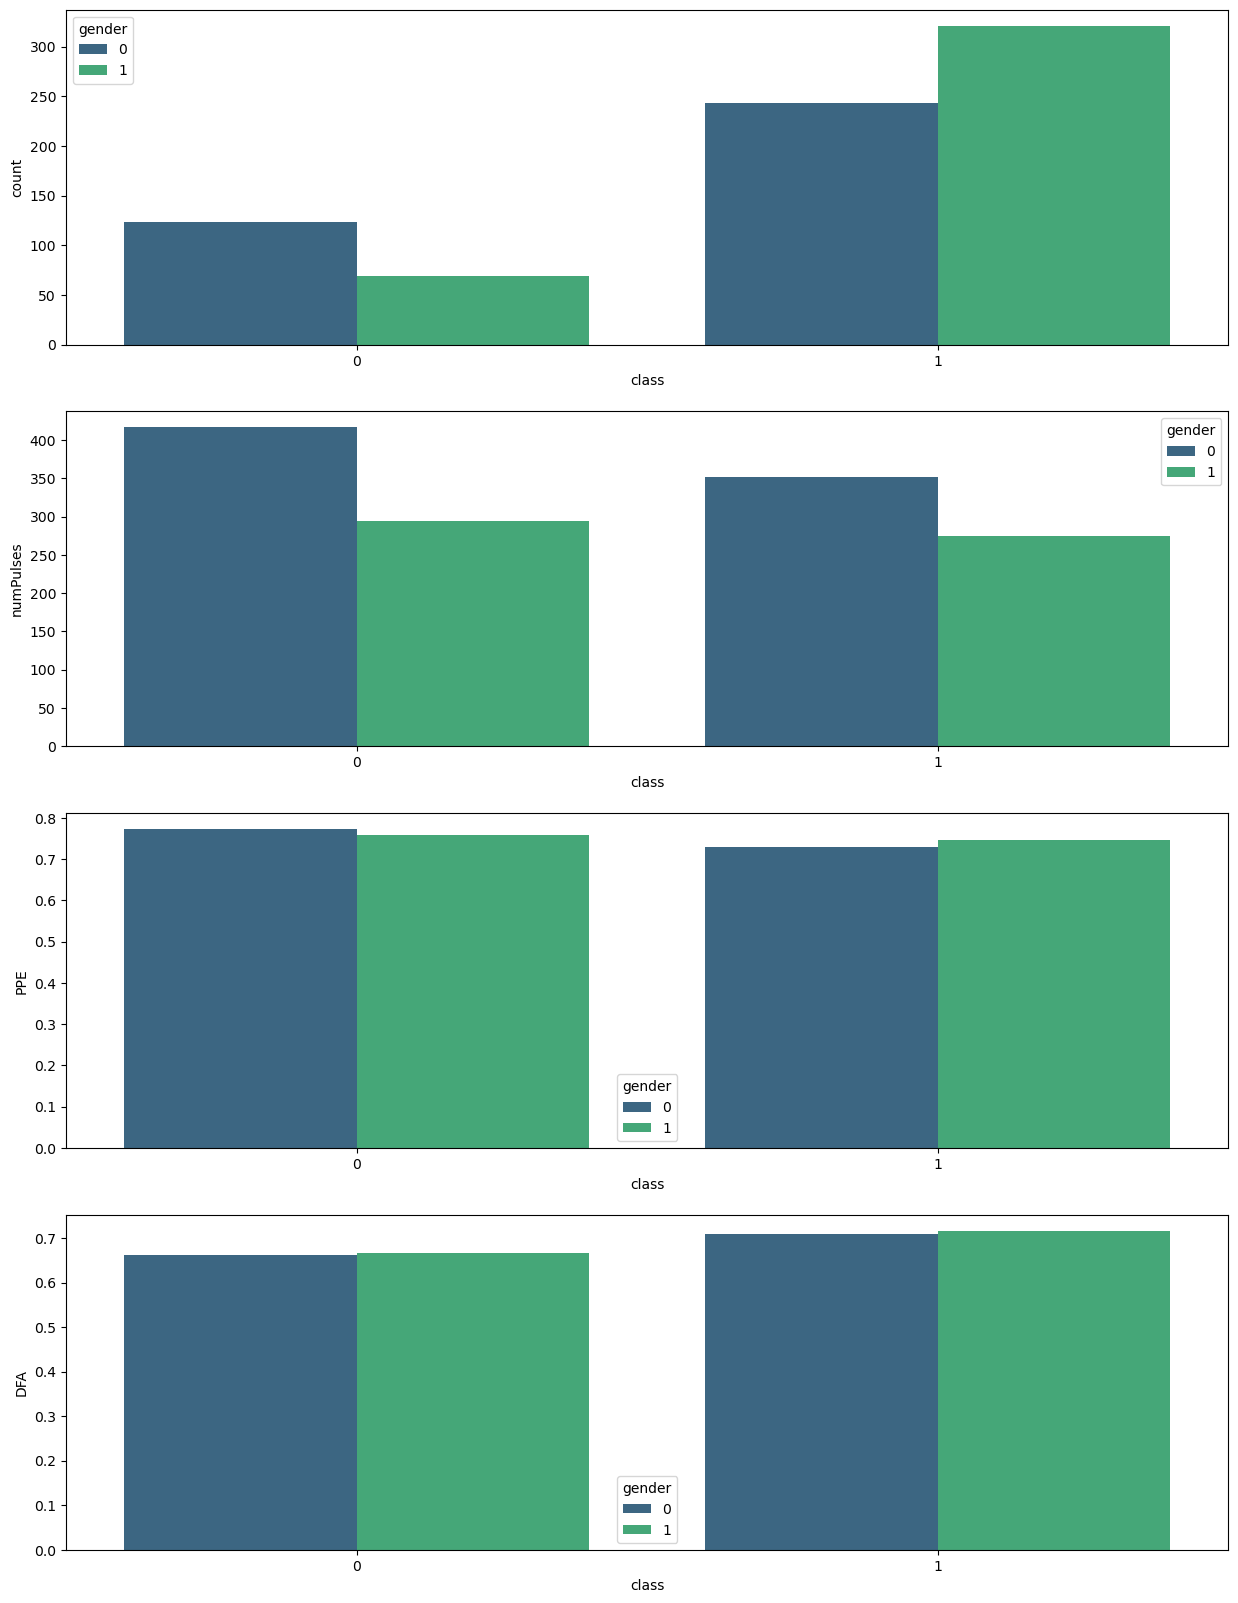

In [6]:
pulse_data = df.groupby(['class', 'gender'])['numPulses'].mean().reset_index()
PPE_data = df.groupby(['class', 'gender'])['PPE'].mean().reset_index()
DFA_data = df.groupby(['class', 'gender'])['DFA'].mean().reset_index()

fig, axes = plt.subplots(4,1,figsize=(15,20))
sns.countplot(data = df, x='class', hue='gender', ax=axes[0], palette='viridis')
sns.barplot(data=pulse_data, x='class', y='numPulses', hue='gender', ax=axes[1],palette='viridis')
sns.barplot(data=PPE_data, x='class', y='PPE', hue='gender', ax=axes[2], palette='viridis')
sns.barplot(data=DFA_data, x='class', y='DFA', hue='gender', ax=axes[3], palette='viridis')
plt.show()

In [7]:
# Selectionner les caracteristiques les plus correlatifs
selected_features = []
corrDict = dict(sorted(df.corr()['class'].to_dict().items(), key=lambda item: item[1], reverse=True))
corrDict.pop('class')

#  Selectionner les top 5 et last 5
selected_features = list(corrDict.keys())[:5]
selected_features.extend(list(corrDict.keys())[-5:])

selected_features

['mean_MFCC_2nd_coef',
 'tqwt_minValue_dec_12',
 'tqwt_minValue_dec_11',
 'tqwt_minValue_dec_13',
 'std_9th_delta_delta',
 'tqwt_maxValue_dec_11',
 'tqwt_entropy_log_dec_12',
 'tqwt_stdValue_dec_11',
 'tqwt_maxValue_dec_12',
 'tqwt_stdValue_dec_12']

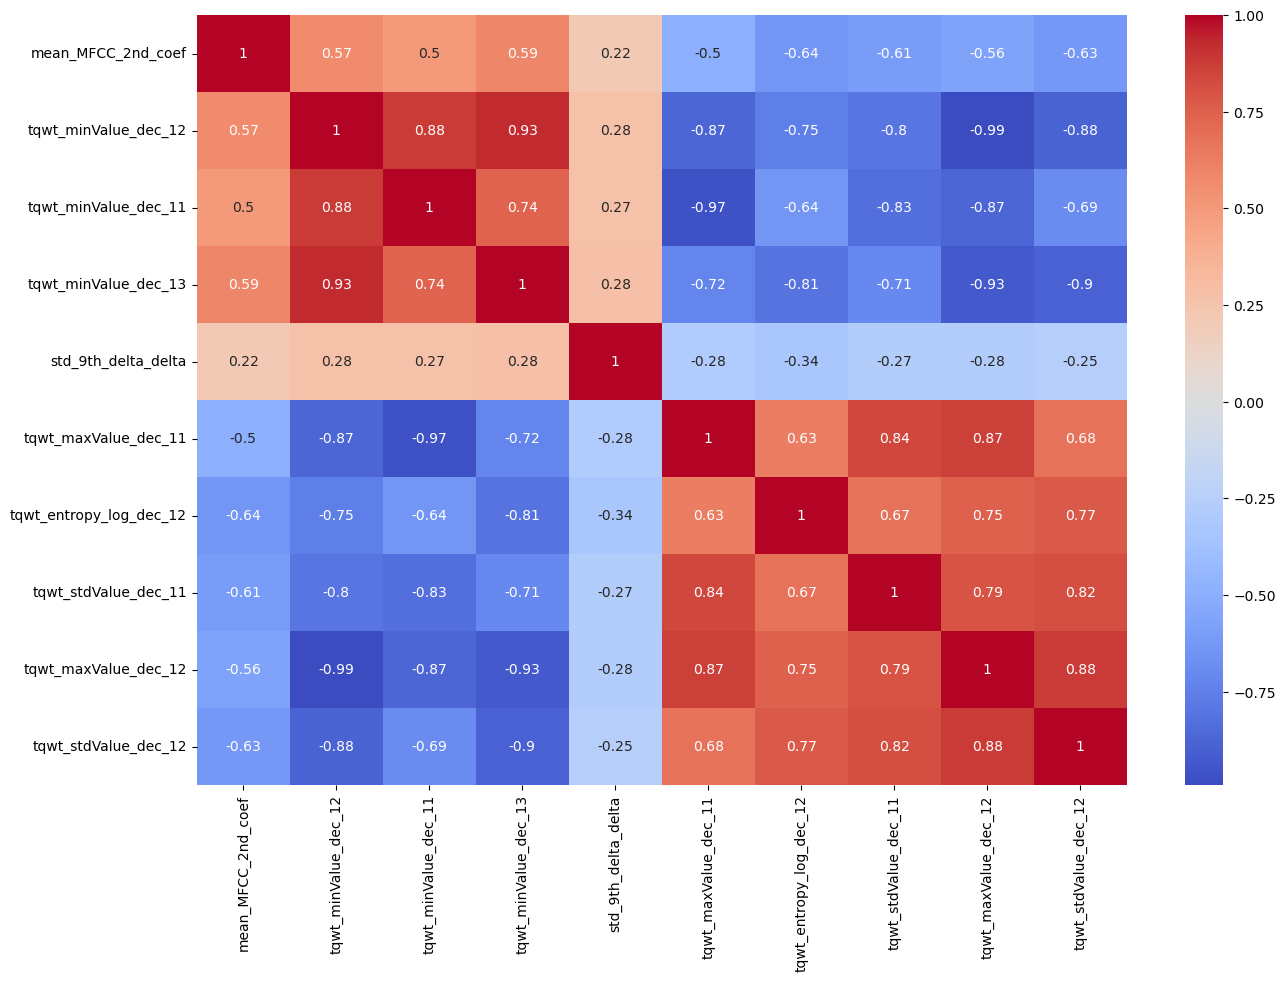

In [8]:
fig, axes = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', ax=axes)
plt.show()


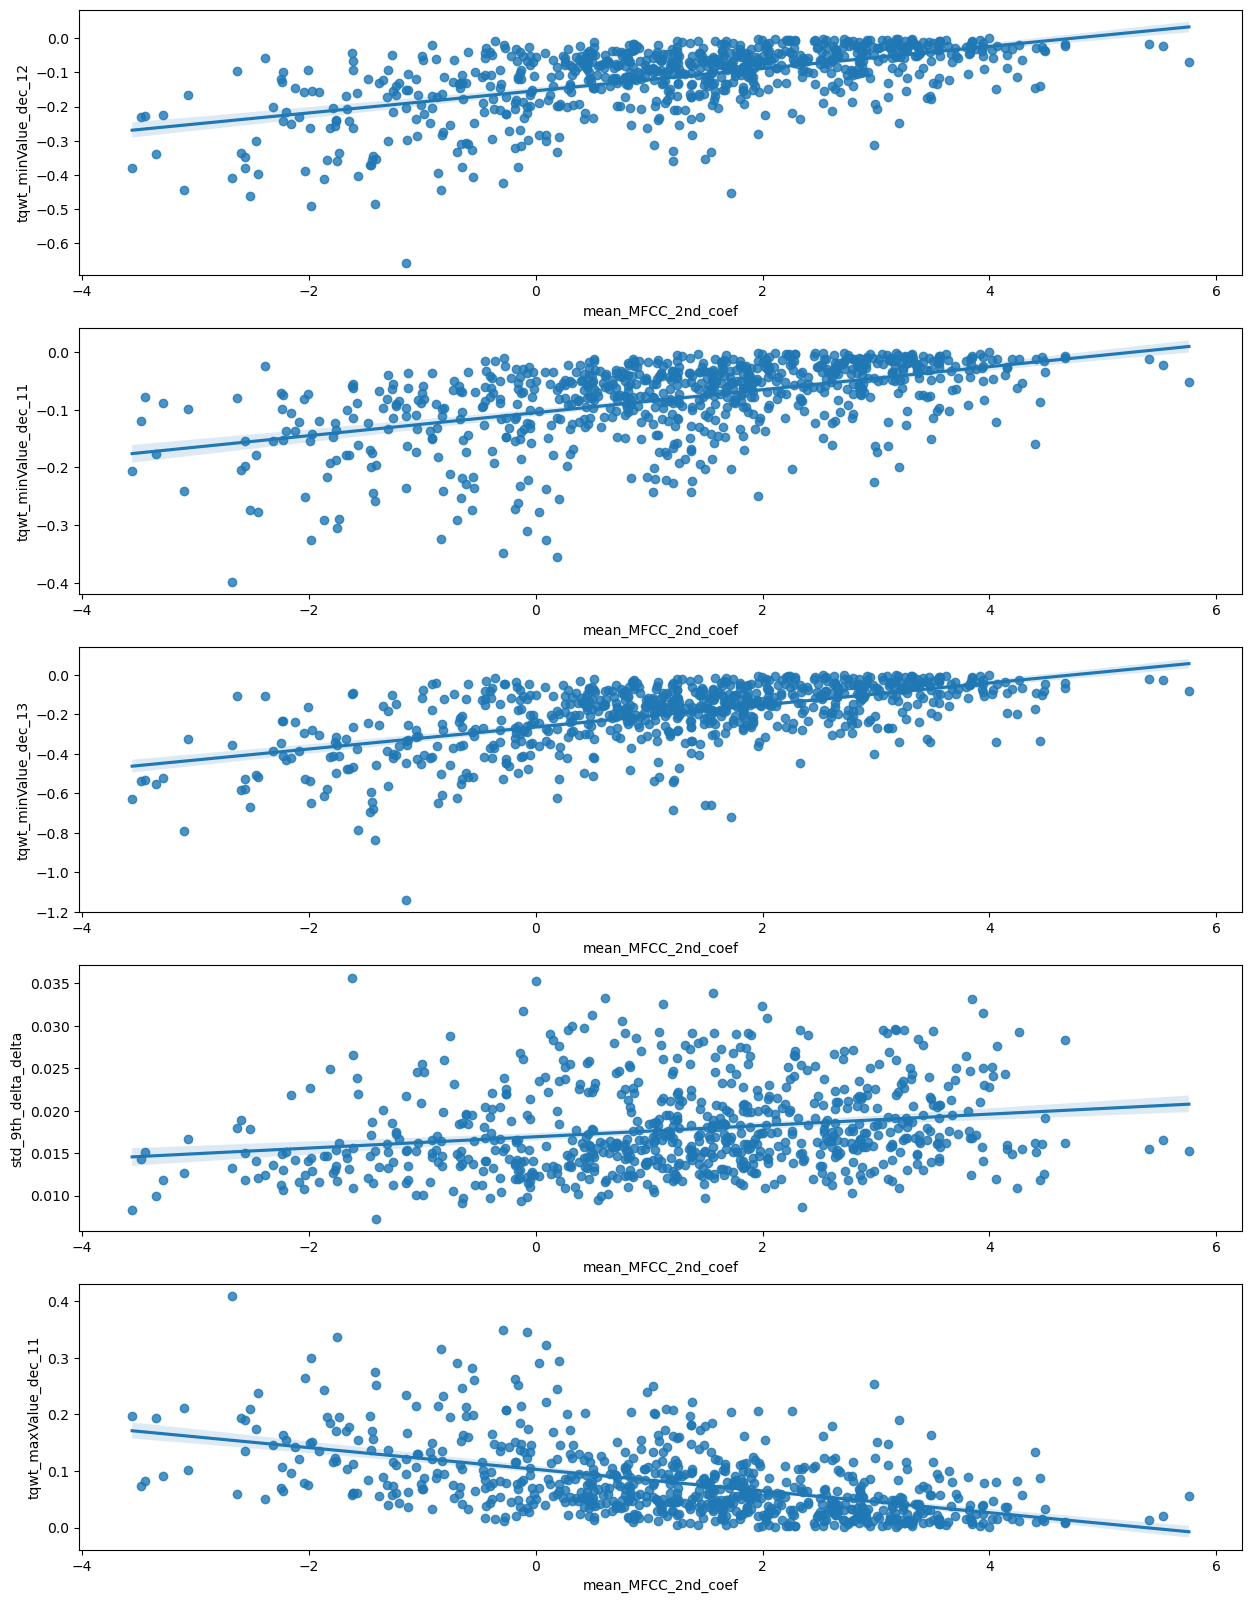

In [9]:
fig, axes = plt.subplots(5,1,figsize=(15,20))

sns.regplot(data= df[selected_features], x = 'mean_MFCC_2nd_coef', y = 'tqwt_minValue_dec_12' , ax=axes[0])
sns.regplot(data= df[selected_features], x = 'mean_MFCC_2nd_coef', y = 'tqwt_minValue_dec_11' , ax=axes[1])
sns.regplot(data= df[selected_features], x = 'mean_MFCC_2nd_coef', y = 'tqwt_minValue_dec_13' , ax=axes[2])
sns.regplot(data= df[selected_features], x = 'mean_MFCC_2nd_coef', y = 'std_9th_delta_delta'  , ax=axes[3])
sns.regplot(data= df[selected_features], x = 'mean_MFCC_2nd_coef', y = 'tqwt_maxValue_dec_11' , ax=axes[4])

plt.show()

<Figure size 1500x1000 with 0 Axes>

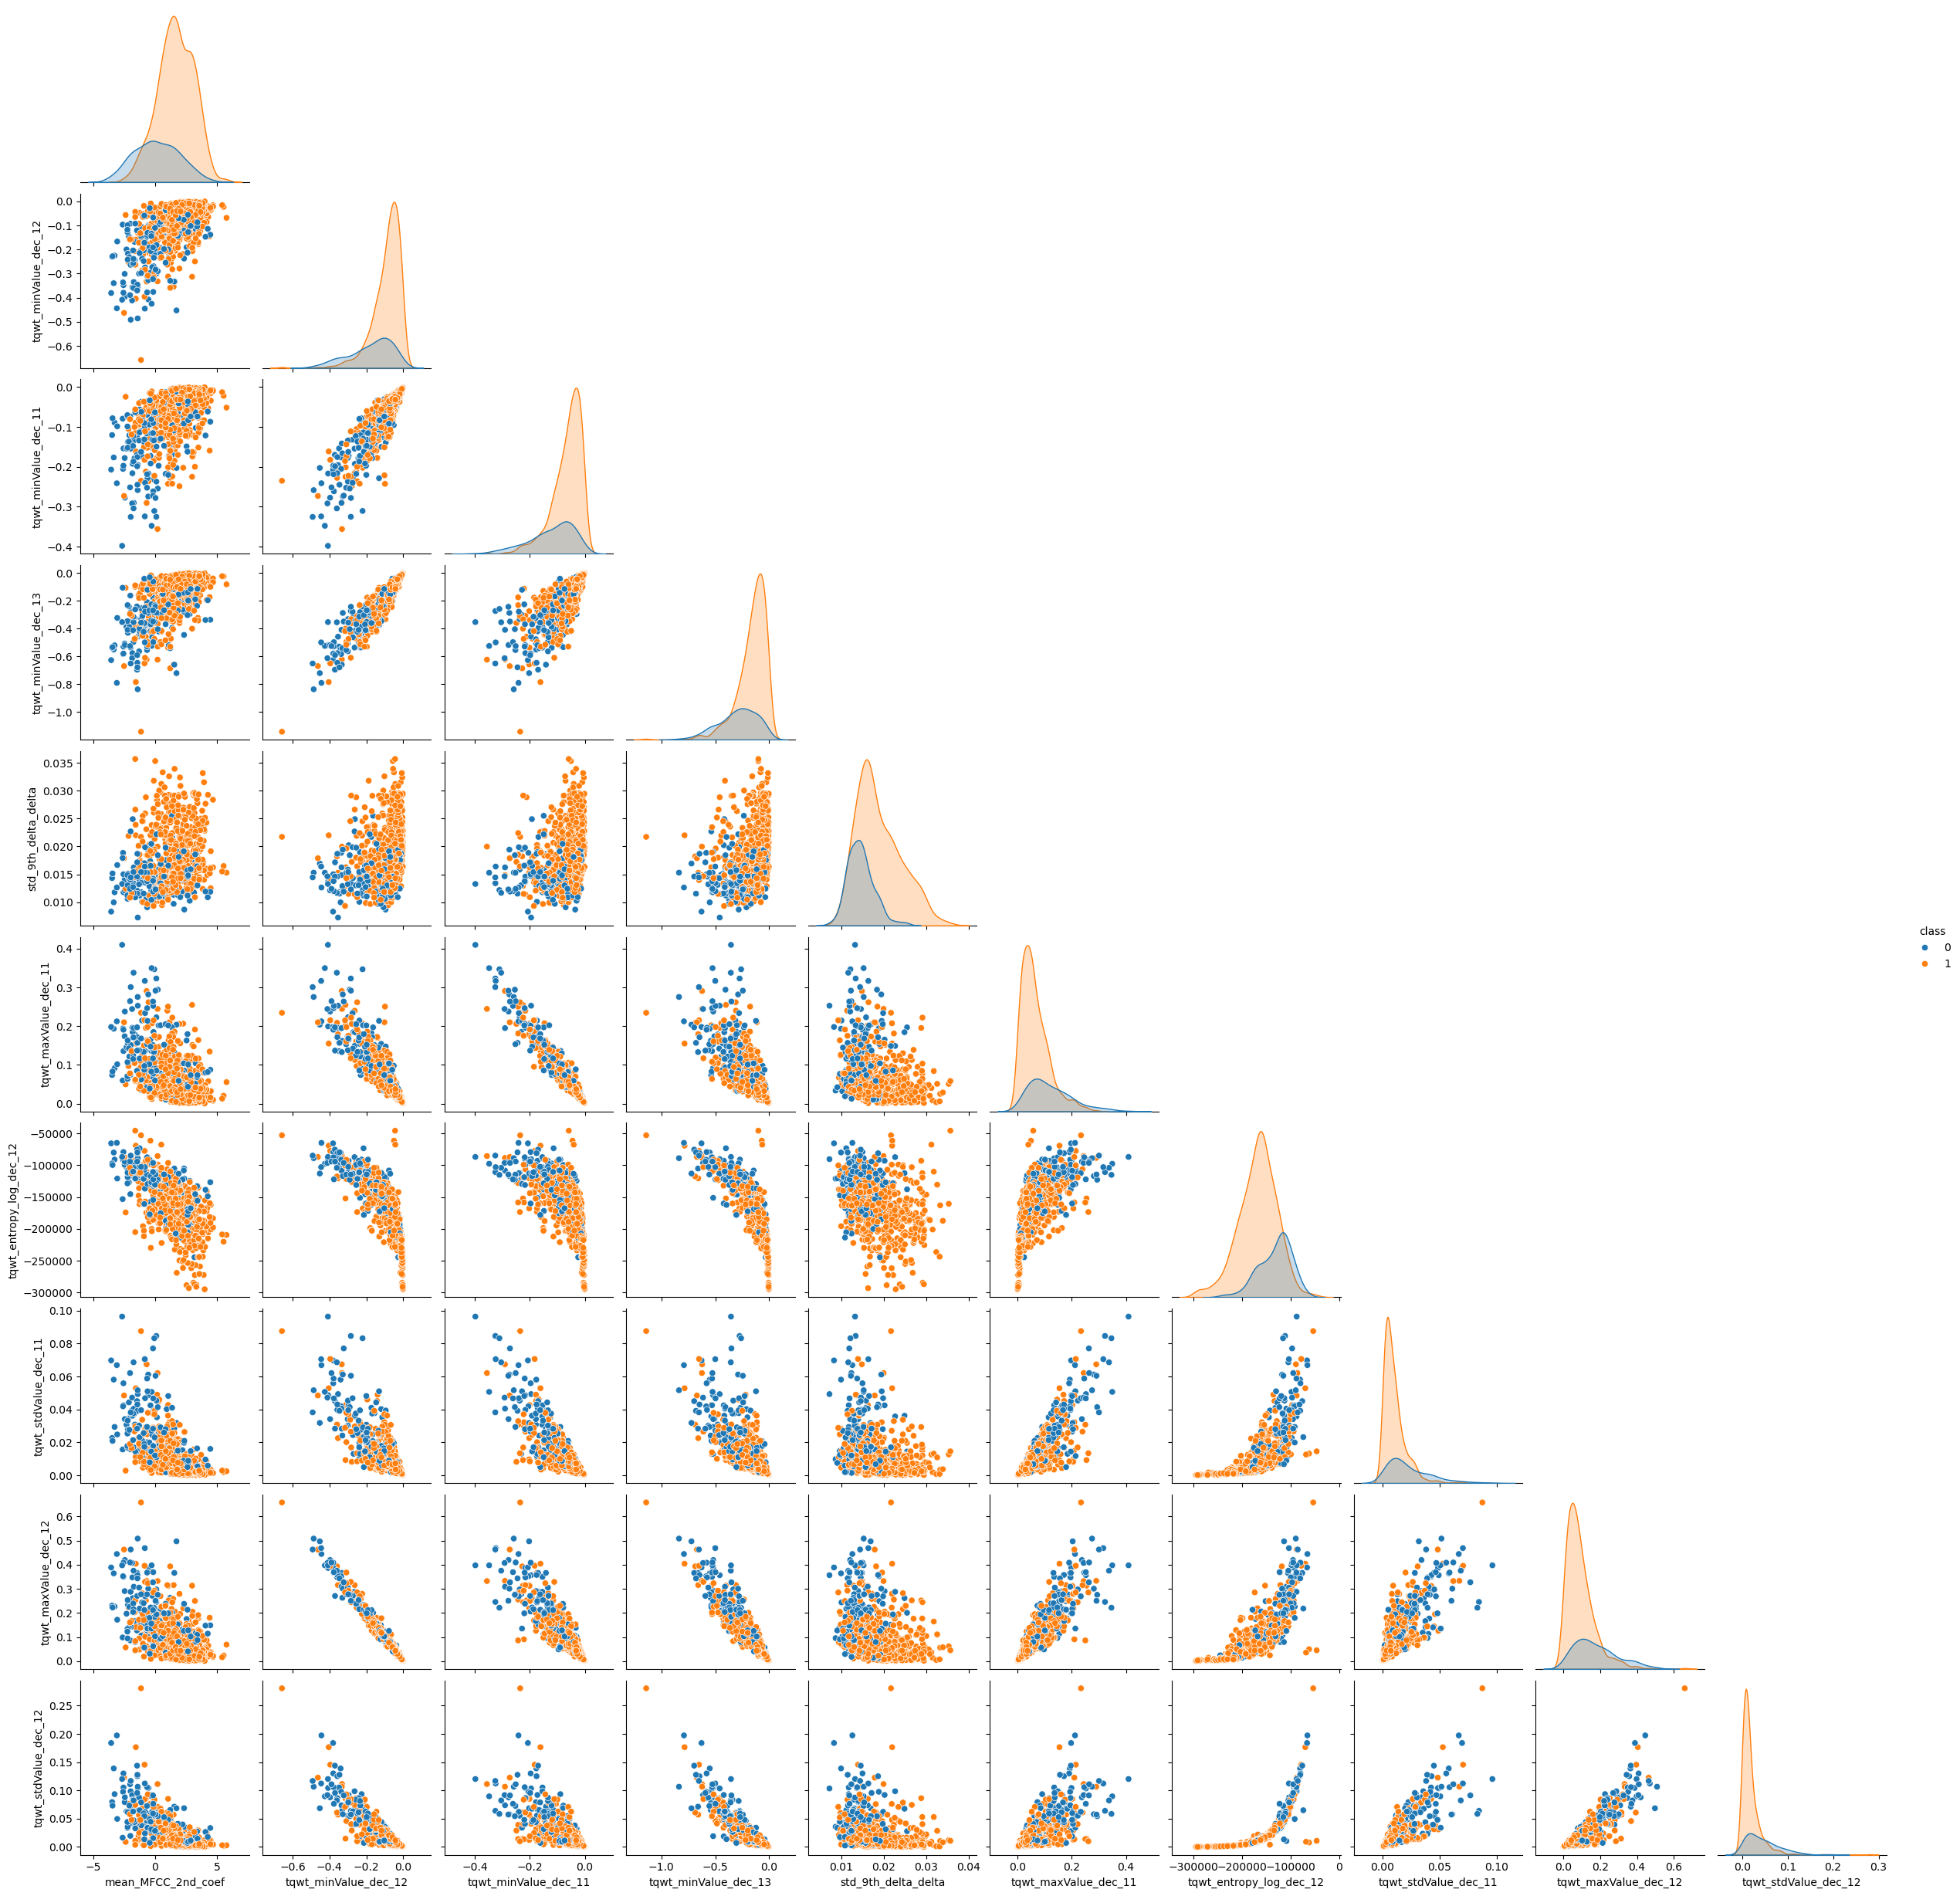

In [10]:
plt.figure(figsize=(15,10))

sns.pairplot(data= pd.concat([df[selected_features], df['class']], axis=1), hue='class', corner=True, diag_kind='kde')
plt.show()

<hr>

## Preprocessing and Ensemble Feature Selection

In [11]:
from preprocessing import preprocessing_pipeline

df, X, y = preprocessing_pipeline(
    df, 
    target_column='class', 
    missing_values_option='drop',
    standerdize=True,
    rebalance=True,
    random_state=42,
    verbose=True, 
)


dropping duplicates ...done
standerdizing ...done


In [12]:
from efsa import efsa_pipeline

subsets = efsa_pipeline(df, target_column='class', verbose=True)

Data Found, importing...
Performing EFSA:
	--->Filter based wrapper... Done
	--->Backward elimination based wrapper: ', end=''
0.5929203539823009
754
754
0.5929203539823009
377
0.7433628318584071
189
0.7433628318584071
95
0.7433628318584071
0.9469026548672567
754
754
0.9469026548672567
Converged at iteration 2968
Converged at iteration 2969
Converged at iteration 2954
Converged at iteration 2954
Converged at iteration 2955
Converged at iteration 2955
Converged at iteration 2955
Converged at iteration 2929
Converged at iteration 2920
Converged at iteration 2886
Converged at iteration 2886
Converged at iteration 2848
Converged at iteration 2848
Converged at iteration 2847
Converged at iteration 2837
Converged at iteration 2837
Converged at iteration 2837
Converged at iteration 2836
Converged at iteration 2852
Converged at iteration 2870
Converged at iteration 2828
Converged at iteration 2830
Converged at iteration 2831
Converged at iteration 2830
Converged at iteration 2833
Converged at 

In [ ]:
print(
    len(subsets['Corr-Filter']),
    len(subsets['RF-Wrapper']),
    len(subsets['LR-Wrapper']),
    len(subsets['Wrapper']),
    len(subsets['RF-Embedded']),
    len(subsets['LR-Embedded']),
    len(subsets['Embedded']),
)


35 47 47 47 1 1 1


In [22]:
# Union des sous-ensembles
subsets['Union'] = list(
    set(
        subsets['Corr-Filter'] + \
        subsets['RF-Wrapper'] + \
        subsets['LR-Wrapper'] + \
        subsets['Wrapper'] + \
        subsets['RF-Embedded'] + \
        subsets['LR-Embedded'] + \
        subsets['Embedded']
    ))
print(len(subsets['Union']))

82


In [23]:
print(subsets['Union'])

['tqwt_TKEO_std_dec_6', 'tqwt_maxValue_dec_27', 'tqwt_TKEO_std_dec_15', 'mean_MFCC_7th_coef', 'mean_11th_delta_delta', 'tqwt_entropy_shannon_dec_27', 'tqwt_energy_dec_12', 'VFER_NSR_TKEO', 'tqwt_minValue_dec_31', 'std_1st_delta_delta', 'app_LT_entropy_shannon_7_coef', 'mean_MFCC_6th_coef', 'tqwt_entropy_shannon_dec_11', 'tqwt_kurtosisValue_dec_35', 'tqwt_TKEO_mean_dec_9', 'tqwt_energy_dec_15', 'tqwt_meanValue_dec_7', 'minIntensity', 'tqwt_TKEO_std_dec_14', 'tqwt_TKEO_std_dec_9', 'tqwt_stdValue_dec_35', 'Ed_4_coef', 'tqwt_TKEO_mean_dec_3', 'tqwt_meanValue_dec_23', 'b3', 'app_entropy_log_8_coef', 'std_9th_delta_delta', 'mean_9th_delta', 'tqwt_entropy_log_dec_35', 'tqwt_TKEO_std_dec_13', 'det_entropy_shannon_10_coef', 'tqwt_TKEO_std_dec_12', 'tqwt_TKEO_std_dec_31', 'tqwt_maxValue_dec_6', 'tqwt_TKEO_mean_dec_35', 'std_8th_delta_delta', 'tqwt_kurtosisValue_dec_19', 'tqwt_energy_dec_31', 'tqwt_entropy_shannon_dec_36', 'apq3Shimmer', 'tqwt_stdValue_dec_12', 'tqwt_skewnessValue_dec_7', 'app_LT

In [30]:
# Essayons de classer avec ces sous-ensembles
from RandomForest import detect_continuous_columns, to_category
import os


if os.path.exists('to_category.csv'):
    df_categorised = pd.read_csv('to_category.csv')
else:
    df_categorised = df.copy()
    continuous_columns = detect_continuous_columns(df_categorised, threshold=10)
    for feature in continuous_columns:
        df_categorised[feature] = to_category(df, feature, 'class')
    df_categorised.to_csv('to_category.csv', index=False)


In [42]:
from RandomForest import train_random_forest, predict_random_forest, accuracy

trees,_ = train_random_forest( 
    df_categorised[list(set(subsets['RF-Wrapper'] + subsets['Corr-Filter'] + subsets['RF-Embedded'] + ['class']))], 
    nbr_trees=8, 
    tree_min_data=10, 
    target_feature='class', 
    tree_max_depth = 12
    )
y_pred = predict_random_forest(trees, df_categorised[subsets['Union']])
accuracy = accuracy(y_pred, df_categorised['class'])
print(accuracy)


0.80550621669627
